# Part 3

In [1]:
import sys
import math
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.utils.data as data

In [2]:
class PalindromeDataset(data.Dataset):

    def __init__(self, seq_length):
        self.seq_length = seq_length

    def __len__(self):
        return sys.maxsize

    def __getitem__(self, idx):
        full_palindrome = self.generate_palindrome()
        return full_palindrome[0:-1], int(full_palindrome[-1])

    def generate_palindrome(self):
        left = [np.random.randint(0, 10) for _ in range(math.ceil(self.seq_length / 2))]
        left = np.asarray(left, dtype=np.float32)
        right = np.flip(left, 0) if self.seq_length % 2 == 0 else np.flip(left[:-1], 0)
        return np.concatenate((left, right))

In [3]:
class VanillaRNN(nn.Module):

    def __init__(self, seq_length, input_dim, hidden_dim, output_dim, batch_size):
        super(VanillaRNN, self).__init__()
        self.seq_length = seq_length
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.batch_size = batch_size
        self.Whx = nn.Parameter(torch.randn(input_dim, hidden_dim))
        self.Whh = nn.Parameter(torch.randn(hidden_dim, hidden_dim))
        self.Wph = nn.Parameter(torch.randn(hidden_dim, output_dim))
        self.bh = nn.Parameter(torch.zeros(1, hidden_dim))
        self.bo = nn.Parameter(torch.zeros(1, output_dim))

    def forward(self, x):
        h = torch.zeros(self.batch_size, self.hidden_dim)
        for t in range(self.seq_length):
            h = torch.tanh(torch.mm(x[:, t].reshape(-1, 1), self.Whx) + torch.mm(h, self.Whh) + self.bh)
        output = torch.mm(h, self.Wph) + self.bo
        return output

In [4]:
steps = 50000
batch_size = 128
input_dim = 1
hidden_dim = 128
output_dim = 10

In [5]:
def draw(steps, accs, losses):
    plt.plot([i for i in range(steps)], losses, '-', color='#4169E1', alpha=0.8, linewidth=1, label="Loss Curve")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Chart")
    plt.show()
    plt.plot([i for i in range(steps)], accs, '-', color='#4169E1', alpha=0.8, linewidth=1, label="Accuracy Curve")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Chart")
    plt.show()

In [6]:
def train(length):
    losses, accs = [], []
    model = VanillaRNN(length - 1, input_dim, hidden_dim, output_dim, batch_size)
    dataset = PalindromeDataset(length)
    data_loader = data.DataLoader(dataset, batch_size)
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
        batch_outputs = model(batch_inputs)
        loss = criterion(batch_outputs, batch_targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = np.mean(np.argmax(batch_outputs.detach().numpy(), axis=1) == batch_targets.detach().numpy())
        losses.append(loss.item())
        accs.append(acc)
        if step % 10000 == 0:
            print('Step: ', step, 'Loss: ', loss.item(), 'Accuracy: ', acc)
        if step == steps - 1:
            print('Step: ', step, 'Loss: ', loss.item(), 'Accuracy: ', acc)
            break
    draw(steps, accs, losses)

Step:  0 Loss:  13.374824523925781 Accuracy:  0.0703125
Step:  10000 Loss:  0.033676959574222565 Accuracy:  0.9921875
Step:  20000 Loss:  0.0008621408487670124 Accuracy:  1.0
Step:  30000 Loss:  2.417557880107779e-05 Accuracy:  1.0
Step:  40000 Loss:  4.060558467244846e-07 Accuracy:  1.0
Step:  49999 Loss:  2.756711694473779e-07 Accuracy:  1.0


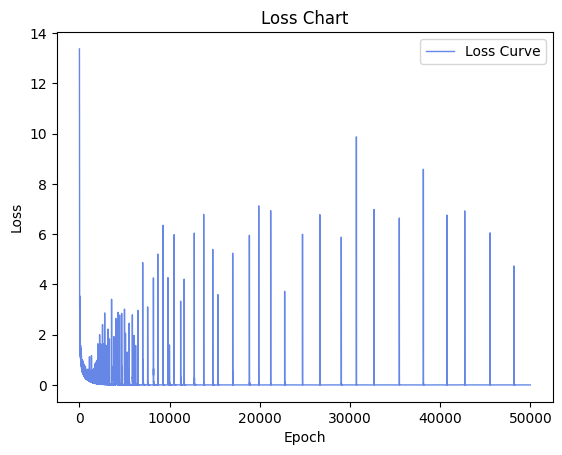

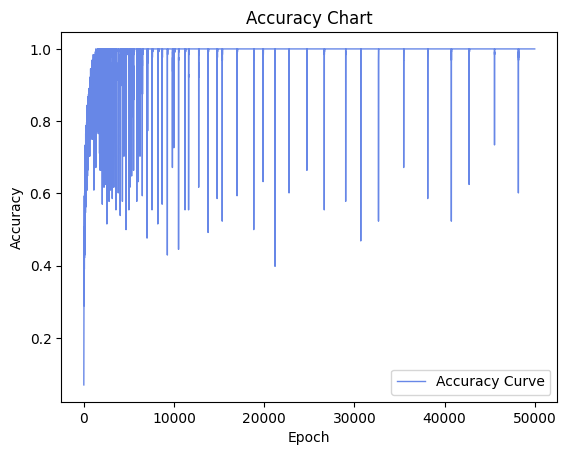

In [7]:
length = 5
train(length)

Step:  0 Loss:  15.662825584411621 Accuracy:  0.1171875
Step:  10000 Loss:  1.7063939571380615 Accuracy:  0.3359375
Step:  20000 Loss:  0.9889423251152039 Accuracy:  0.5546875
Step:  30000 Loss:  0.5460304021835327 Accuracy:  0.734375
Step:  40000 Loss:  0.09754929691553116 Accuracy:  0.96875
Step:  49999 Loss:  0.00614581536501646 Accuracy:  1.0


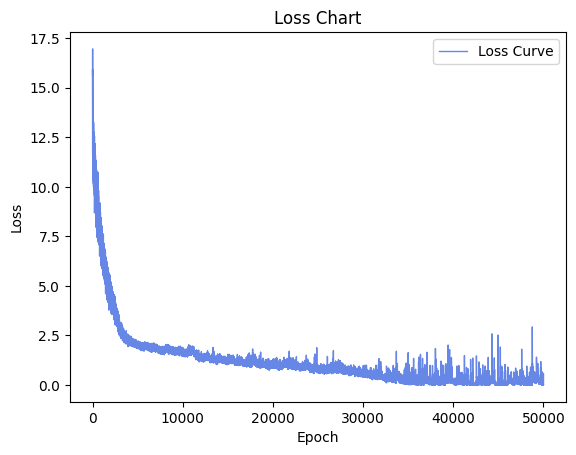

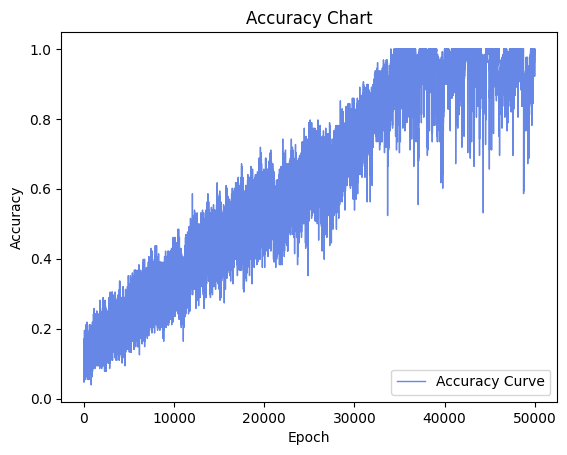

In [8]:
length = 10
train(length)

Step:  0 Loss:  16.442237854003906 Accuracy:  0.078125
Step:  10000 Loss:  2.3114845752716064 Accuracy:  0.09375
Step:  20000 Loss:  2.28505277633667 Accuracy:  0.1171875
Step:  30000 Loss:  2.279358386993408 Accuracy:  0.1484375
Step:  40000 Loss:  2.2046945095062256 Accuracy:  0.1171875
Step:  49999 Loss:  2.299473285675049 Accuracy:  0.15625


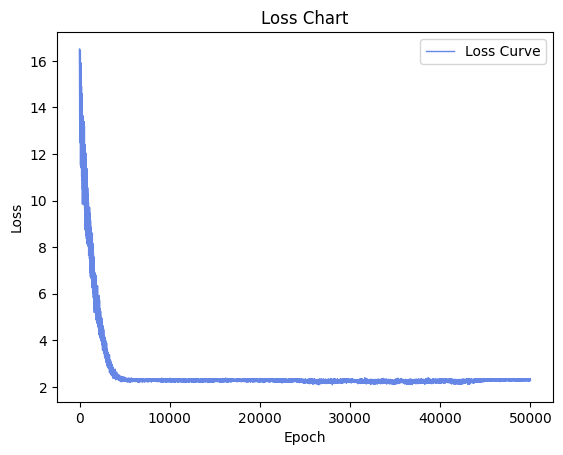

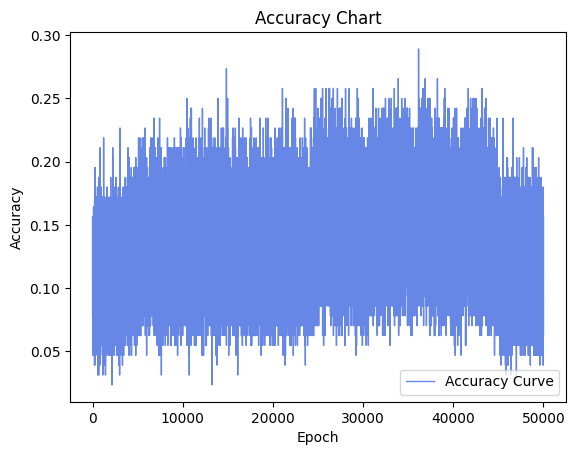

In [9]:
length = 15
train(length)

Step:  0 Loss:  18.85043716430664 Accuracy:  0.0859375
Step:  10000 Loss:  2.3159406185150146 Accuracy:  0.09375
Step:  20000 Loss:  2.305853843688965 Accuracy:  0.09375
Step:  30000 Loss:  2.3311171531677246 Accuracy:  0.078125
Step:  40000 Loss:  2.3259429931640625 Accuracy:  0.109375
Step:  49999 Loss:  2.306450366973877 Accuracy:  0.109375


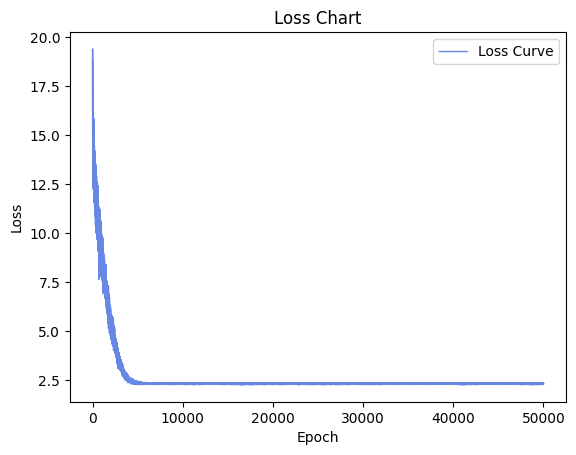

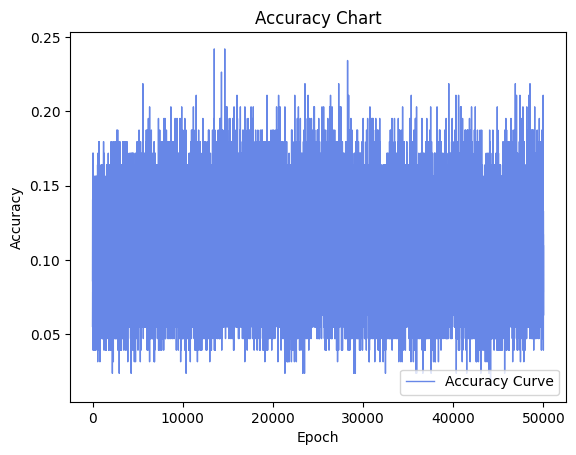

In [10]:
length = 20
train(length)